# 📖 Feature Engineering și Selecția Variabilelor în Machine Learning
## Scop: Îmbunătățirea performanței modelelor prin transformarea și selecția variabilelor.
---


## 🔍 1. Ce înseamnă feature engineering?
**Feature** = variabilă 

**Engineering** = crearea, transformarea și selecția variabilelor pentru a îmbunătăți capacitatea modelelor de a învăța relațiile corecte dintre variabile

In [2]:
#Importare librarii necesare
import numpy as np #operatii matematice (medii,abateri standard etc)
import pandas as pd #prelucrare tabele
#grafice
import seaborn as sns 
import matplotlib.pyplot as plt

**Descrierea și preluarea setului de date**

Fișierul Housing.csv date despre prețurile locuințelor, incluzând 13 caracteristici relevante:

1. **Price**: Prețul locuinței.  
2. **Area**: Suprafața totală a locuinței (mp).  
3. **Bedrooms**: Numărul de dormitoare.  
4. **Bathrooms**: Numărul de băi.  
5. **Stories**: Numărul de etaje.  
6. **Mainroad**: Conectare la drumul principal (Yes/No).  
7. **Guestroom**: Există cameră pentru oaspeți (Yes/No).  
8. **Basement**: Locuința are subsol (Yes/No).  
9. **Hot water heating**: Sistem de încălzire cu apă caldă (Yes/No).  
10. **Airconditioning**: Are aer condiționat (Yes/No).  
11. **Parking**: Număr de locuri de parcare.  
12. **Prefarea**: Situată într-o zonă preferată (Yes/No).  
13. **Furnishing status**: Mobilată complet, parțial sau nemobilată.

In [5]:
#preluare set date
df = pd.read_csv("./Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Valori lipsa**

In [36]:
df.isnull().sum() #arata cate valori lipsă sunt pt fiecare variabilă

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 🔹 1.1. Variabile Derivate
Creăm noi variabile din cele existente.

In [42]:

#Am creat o varabila care insumeaza nr de dormitoare + camera de oaspeti pt a calcula nr total de camere
df["total_rooms"] = df["bedrooms"] + (df["guestroom"] == "yes").astype(int)

print(df[["bedrooms", "guestroom", "total_rooms"]].head())




   bedrooms guestroom  total_rooms
0         4        no            4
1         4        no            4
2         3        no            3
3         4        no            4
4         4       yes            5


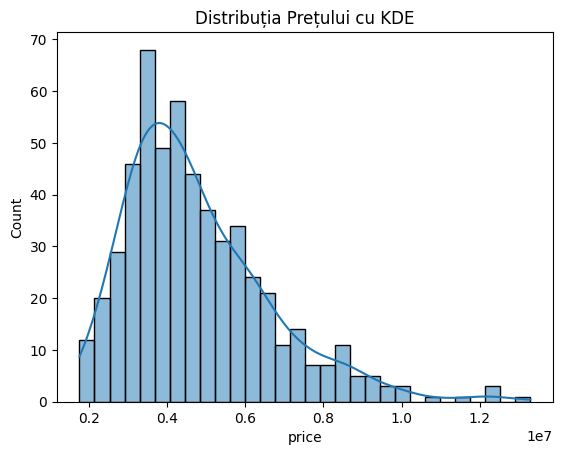

In [43]:
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribuția Prețului cu KDE")
plt.show()

In [ ]:
#transformare logaritmica pe pret            
df['log_price'] = np.log(df['price'])
df[["price","log_price"]].head()

,price,log_price
0,13300000,16.403275
1,12250000,16.321036
2,12250000,16.321036
3,12215000,16.318175
4,11410000,16.250001


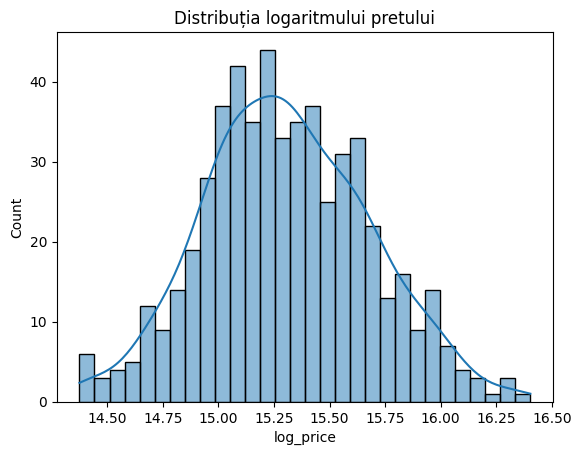

In [45]:
sns.histplot(df["log_price"], bins=30, kde=True)
plt.title("Distribuția logaritmului pretului")
plt.show()  

### 🔹 1.2. Agregări pentru Variabile Categoriale
Calculăm statistici pentru fiecare categorie.

In [ ]:
df_grouped = df.groupby("furnishingstatus")["price"].agg(['mean', 'sum', 'count']).reset_index()

#formatare numere
df_grouped = df_grouped.map(lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.') if isinstance(x, (int, float)) else x)

df_grouped




,furnishingstatus,mean,sum,count
0,furnished,"5.495.696,00","769.397.440,00","140,00"
1,semi-furnished,"4.907.524,23","1.114.008.000,00","227,00"
2,unfurnished,"4.013.831,46","714.462.000,00","178,00"


Functie customizata

In [72]:
def calculate_variance(series):
    return series.mean() / series.std() if series.std() != 0 else float('nan')

df_variance = df.groupby("furnishingstatus")["price"].agg(calculate_variance).reset_index(name="Variance")


df_variance


,furnishingstatus,Variance
0,furnished,2.59
1,semi-furnished,3.07
2,unfurnished,2.33


### 🔹 1.3. Agregări pentru Variabile Numerice
Calculăm statistici pentru fiecare categorie

In [57]:
numerical_variables = ["price","area","bathrooms","stories","parking"]
df[numerical_variables].agg(['mean', 'sum', 'min', 'max'])


,price,area,bathrooms,stories,parking
mean,"4,766,729.25","5,150.54",1.29,1.81,0.69
sum,"2,597,867,440.00","2,807,045.00",701.00,984.00,378.00
min,"1,750,000.00","1,650.00",1.00,1.00,0.00
max,"13,300,000.00","16,200.00",4.00,4.00,3.00


Exemplu de functie custom


In [ ]:
#pt fiecare variabila numerica mentionata se calculeaza statisticile
def custom_summary(series):
    return pd.Series({
        'Mean': series.mean(),
        'Median': series.median(),
        'Range': series.max() - series.min(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),  # Interquartile Range
        'Skewness': series.skew(),  # Asimetria distribuției
        'Kurtosis': series.kurt()   # Curtosis (aplatisare)
    })

# apelul este nume_df[[variable]].agg(functie care se executa pe fiecare variabila)

df[["price","area"]].agg(custom_summary)

,price,area
Mean,"4,766,729.25","5,150.54"
Median,"4,340,000.00","4,600.00"
Range,"11,550,000.00","14,550.00"
IQR,"2,310,000.00","2,760.00"
Skewness,1.21,1.32
Kurtosis,1.96,2.75


### 🔹 1.4 Extragere date temporale


In [3]:
# Creare dataset cu date calendaristice
df_date = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=5, freq='D')})

# Extragere de caracteristici temporale
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['day_of_week'] = df_date['date'].dt.day_name()
df_date['is_weekend'] = df_date['date'].dt.weekday >= 5
df_date

,date,year,month,day,day_of_week,is_weekend
0,2023-01-01,2023,1,1,Sunday,True
1,2023-01-02,2023,1,2,Monday,False
2,2023-01-03,2023,1,3,Tuesday,False
3,2023-01-04,2023,1,4,Wednesday,False
4,2023-01-05,2023,1,5,Thursday,False


## ✏️ 2. Selecția Variabilelor




| **Etapă** | **Scop** | **Metodă utilizată** |
|-----------|---------|---------------------|
| **Înțelegerea variabilelor** | Identificarea tipurilor de date | Explorare vizuală și descriptivă |
| **Eliminarea variabilelor redundante** | Evitarea colinearității | Matrice de corelație |
| **Eliminarea variabilelor cu varianță mică** | Eliminarea celor neinformative | VarianceThreshold |
| **Testul relației cu ținta** | Păstrarea variabilelor importante | Test Chi2, ANOVA, f-regression |
| **Algoritmi de selecție** | Selectarea celor mai bune variabile | RFE, Random Forest, PCA |



### 🔹 2.1 Selecția bazată pe corelație

In [ ]:
#pentru a realiza matricea de corelatie ar trebui sa codificam variabilele nenumeriuce
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Creăm variabile dummy pentru 'furnishingstatus'
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

# Afișăm primele rânduri pentru a verifica transformarea
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       